Working with data that has survived Muon ID Cuts, Object Cuts, and the Track Length Cut.

(NuMI angle cut & Opening angle cut have not been applied.)

In [1]:
1+2

3

In [2]:
import uproot
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
from unc_funcs import *

/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.20.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[0.39431672 0.04210058 0.91800973]


In [3]:
savestuff = False

POTSTR = "2e20 POT"

dir = '/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/no_cuts/'

In [4]:
evtdf = pd.read_pickle(dir + 'final_df')
mc_res = pd.read_pickle(dir + 'res_mc')
pc_res = pd.read_pickle(dir + 'res_percent')
pot_res = pd.read_pickle(dir + 'res_pot')

#hdrs = [pd.read_hdf(f, key="hdr") for f in df_files]

In [5]:
mc_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_S$ = 300, $\theta_S$ = 3e-05","$M_S$ = 330, $\theta_S$ = 2e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0",$\nu$,Cosmic
preselection,321,863,983,2264,2452,10808,11041,14752,16270,7074,18573,16908,74739,190985


In [6]:
pot_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_S$ = 300, $\theta_S$ = 3e-05","$M_S$ = 330, $\theta_S$ = 2e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0",$\nu$,Cosmic
preselection,3.03,30.03,54.11,4.67,1.68,3.62,5.23,7.92,15.1,0.03,0.06,0.03,18438.07,40256.09


In [7]:
categories = make_categories(evtdf, detailed_nu=True)
for sample in categories:
    print(sample.name)

$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_S$ = 300, $\theta_S$ = 3e-05
$M_S$ = 330, $\theta_S$ = 2e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 1000000.0
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0
$\nu_\mu$ CC COH
$\nu_\mu$ CC n$\pi$0p
$\nu_\mu$ CC n$\pi$np
$\nu_\mu$ CC Other
not $\nu_\mu$ CC
Cosmic


In [8]:
# Only consider the categories you want!

categories = categories[:3]+categories[5:9]+categories[12:] #[:3, 5:9, 12:]
for c in categories:
    print(c.name)

$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$\nu_\mu$ CC COH
$\nu_\mu$ CC n$\pi$0p
$\nu_\mu$ CC n$\pi$np
$\nu_\mu$ CC Other
not $\nu_\mu$ CC
Cosmic


In [6]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'npi', '', '', '')
('slc', 't

## Set sideband thresholds

In [9]:
NuMI_angle_thresh = 0.15 # Use for selection: < 0.05 rad
open_angle_thresh = [1.25, 2]# Use for selection: < 0.35 rad 

## Check distributions

In [16]:
def plot_scalar_numi_angle(df, bins = 25, vline=None, bsm=False, detailed_nu=True,
                           density=True, POTSTR=POTSTR, sample_description=""):
    fig = plt.figure()
    ax = plt.subplot(111)
    
    var = df.Snumi_angle_mcs
    scale = df.scale.copy()
    var[np.isnan(var) | (var < 0)] = -10
    
    if bsm == True:
        categories = make_categories(df, bsm=True)
    elif detailed_nu == True:
        categories = make_categories(df, detailed_nu=True)
    else:
        categories = make_categories(df)
    categories = categories[:3]+categories[5:9]+categories[12:] #[:3, 5:9, 12:]
    myrange = (0,0.5)
    for c in categories:
        _ = plt.hist(var[c], weights=scale[c], bins=bins, label=c.name, color=c.color,
                     histtype="step", linewidth=2, density=density, range=myrange)
    
    #plt.legend()
    plt.title("ICARUS MC"+sample_description+" \n direction determined w/ MCS for $p_\\mu$")
    plt.xlabel("Parent Angle to Beam (rad)")
    plt.xlim(myrange)
    if density:
        plt.ylabel("Area Normalized")
    else:
        plt.ylabel("Candidates / %s" % POTSTR)
    plt.yscale("log")
    if vline is not None:
        for val in vline:
            plt.axvline([val], linestyle=":", color="r", linewidth=2)
    #plt.axvline([NuMI_angle_thresh], linestyle=":", color="r", linewidth=2)
    #plt.text(0.6, 0.4, label, transform=plt.gca().transAxes, fontsize=18)
    plt.tight_layout()
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

    #if dosave: plt.savefig(savedir + "max_shw_len_M%i.pdf" % HMASS)
    plt.show()
    


/tmp/ipykernel_28337/3565858342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


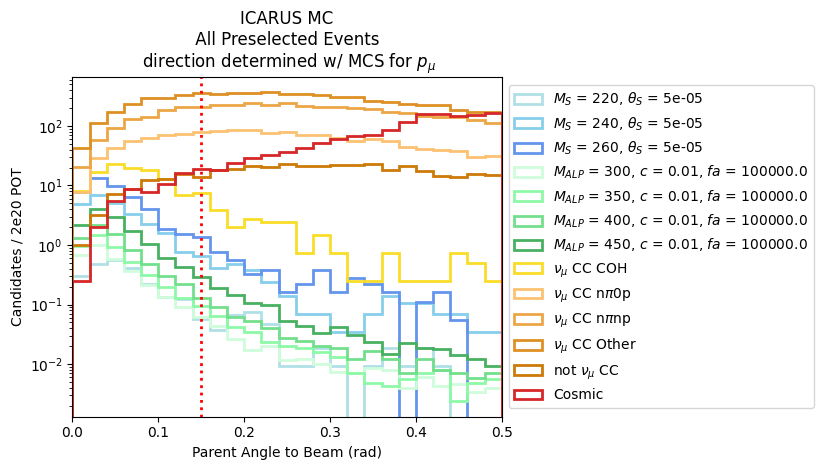

In [17]:
plot_scalar_numi_angle(evtdf, bsm=False, density=False, vline=[NuMI_angle_thresh],
                       sample_description="\n All Preselected Events") # 

In [14]:
def plot_trk_open_angle(df, bins=np.linspace(0, np.pi, 21), vline = None, bsm=False, detailed_nu=False,
                        density=True, POTSTR=POTSTR, sample_description=""):    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    var = np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) #* 180 / np.pi
    scale = df.scale.copy()

    if bsm == True:
        categories = make_categories(df, bsm=True)
    elif detailed_nu == True:
        categories = make_categories(df, detailed_nu=True)
    else:
        categories = make_categories(df)
    categories = categories[:3]+categories[5:9]+categories[12:] #[:3, 5:9, 12:]
    for c in categories:
        _ = plt.hist(var[c], weights=scale[c], bins=bins, label=c.name, color=c.color,
                     histtype="step", linewidth=2, density=density)
    #plt.legend()
    plt.tight_layout()
    plt.xlim((0, np.pi))
    plt.yscale("log")
    plt.xlabel("Reconstructed Opening Angle (rad)")
    plt.title("ICARUS MC"+sample_description)
    if density:
        plt.ylabel("Area Normalized")
    else:
        plt.ylabel("Candidates / %s" % POTSTR)
    plt.tight_layout()
    if vline is not None:
        for val in vline:
            plt.axvline([val], linestyle=":", color="r", linewidth=2) 
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
    
    #if dosave: plt.savefig(savedir + "trklen.pdf")
    plt.show()

/tmp/ipykernel_28337/1784898686.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


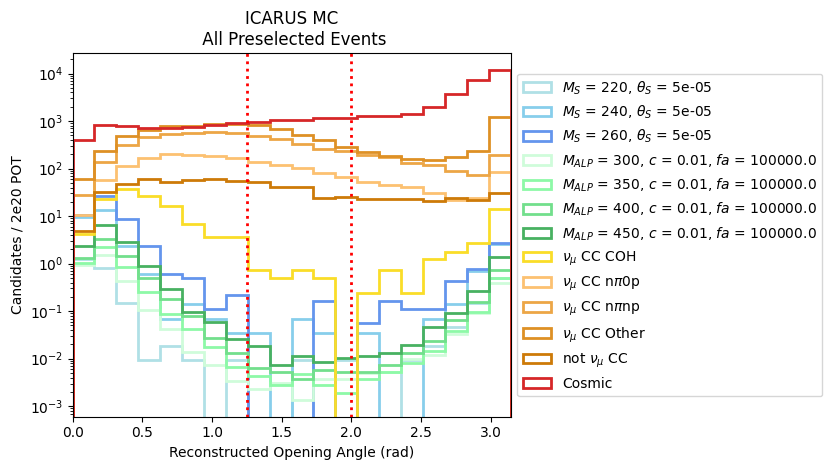

In [15]:
plot_trk_open_angle(evtdf, density=False, sample_description="\n All Preselected Events", 
                    vline = open_angle_thresh, detailed_nu=True) 

To Do THURSDAY 11/9:

- Add functionality to plotting procedures that lets you put vertical lines on to show the sidebands you're trying out.
- Write new cuts that let you choose sideband regions for...
    - NuMI angle
    - Opening angle
- Check POT-norm. event count in those sidebands.

- Figure out what the optimal model benchmarks are 
- Scale to optimal model benchmarks

In [18]:
def sb_numi_angle_mask(df, thresh = NuMI_angle_thresh):
    return df.Snumi_angle_mcs > thresh, 'S_NuMI_angle > '+str(thresh)+' rad'#'\u00B0'

def sb_open_angle_mask(df, thresh = open_angle_thresh):
    return ( ( (np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) > thresh[0]) & 
            (np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) < thresh[1]) ), 
            str(thresh[0])+' rad < opening angle < '+str(thresh[1])+' rad')
    #return thresh[0] < np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)), str(thresh[0])+' rad < opening angle'#' < '+str(thresh[1])+' rad'

# Explore NuMI Angle Sideband

### Apply the cuts

In [19]:
def apply_cuts(df, cuts, flip_last_cut=False):
    
    #new_df = df.copy()
    categories = make_categories(df)
    categories = categories[:3]+categories[5:9]+categories[12:]
    
    # initialze data frames
    cut_results_df = pd.DataFrame(
        np.zeros((0,len(categories)), dtype=int), # start w/ zero rows (cuts), fill later
        columns = [c.name for c in categories] # [c.name.split(',')[-1] for c in categories]
    )
    cut_results_df_mc = cut_results_df.copy() #deep=True
    cut_results_df_pot = cut_results_df.copy() #deep=True
    cut_results_df_percent = cut_results_df.copy() #deep=True
    
    # fill in first row of data frame for "no cuts"
    row_mc = []
    row_pot = []
    for c in categories:
        #print(sum(df[c].scale))
        row_mc.append(df[c].shape[0])
        row_pot.append(sum(df[c].scale))
    cut_results_df_mc.loc["preselection"] = row_mc 
    first_row_mc = row_mc
    cut_results_df_pot.loc["preselection"] = row_pot
    cut_results_df_percent.loc["preselection"] = [1.] * len(row_pot)
    
    # Loop through cuts to make rows for data frame and to make master_mask
    for i in range(len(cuts)):
        func_output = cuts[i](*[df])
        if flip_last_cut: #overwrite with the flip
            if i == len(cuts)-1:
                func_output = cuts[i](*[df], flip=True)
                
        if i==0: 
            master_mask = func_output[0]
        else:
            master_mask = master_mask & func_output[0]
        new_df = df[master_mask]
        new_categories = make_categories(new_df)
        new_categories = new_categories[:3]+new_categories[5:9]+new_categories[12:]
        
        row_mc = []
        row_pot = []
        for c in new_categories:
            print(c.name)
            row_mc.append(new_df[c].shape[0])
            row_pot.append(sum(new_df[c].scale))
        cut_results_df_mc.loc[func_output[1]] = row_mc   
        cut_results_df_pot.loc[func_output[1]] = row_pot
        cut_results_df_percent.loc[func_output[1]] = np.array(row_mc)/np.array(first_row_mc)
    
    return cut_results_df_mc, cut_results_df_pot, cut_results_df_percent, master_mask 

In [20]:

cut_results = apply_cuts(evtdf, [sb_numi_angle_mask, sb_open_angle_mask], flip_last_cut=False)
mask = cut_results[-1]
mc_res = cut_results[0]
pot_res = cut_results[1]
percent_res = cut_results[2]
final_df = evtdf[mask]
#final_df = add_hdr_info(evtdf[mask])

$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$\nu$
Cosmic


/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$\nu$
Cosmic


Here, "preselection" means all but the kinematic cuts applied. Ie what I started with at top of this notebook:

In [21]:
mc_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0",$\nu$,Cosmic
preselection,321,863,983,10808,11041,14752,16270,74739,190985
S_NuMI_angle > 0.15 rad,84,138,153,1515,1427,1867,2141,61975,190612
1.25 rad < opening angle < 2 rad,2,4,3,42,30,45,55,17500,24371


In [45]:
pot_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0",$\nu$,Cosmic
preselection,3.028454,30.031045,54.111928,3.617838,5.226243,7.915960,15.098914,18438.074130,40256.089744
S_NuMI_angle > 0.15 rad,0.792493,4.802183,8.422304,0.507127,0.675469,1.001837,1.986895,15289.201678,40196.938407
1.25 rad < opening angle < 2 rad,0.018869,0.139194,0.165143,0.014059,0.014200,0.024147,0.051041,4317.241297,5106.985816


In [46]:
percent_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0",$\nu$,Cosmic
preselection,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
S_NuMI_angle > 0.15 rad,0.261682,0.159907,0.155646,0.140174,0.129246,0.126559,0.131592,0.829219,0.998047
1.25 rad < opening angle < 2 rad,0.006231,0.004635,0.003052,0.003886,0.002717,0.003050,0.003380,0.234148,0.127607


In [81]:
final_df

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
0      37       10    0                            0 -196.552139  -85.766907   
       42       7     13                           0  297.757812 -166.888245   
       50       24    16                           0  304.259155  -39.924988   
       98       13    15                           0  179.461090  -87.511444   
       131      8     0                            0 -272.805908   71.299500   
..                                               ...         ...         ...   
12     6991     153   0                            0 -223.269165 -152.754761   
       6998     70    10                           0  254.442719   38.646736   
       7000     144   13                           0  221.889069  -42.164948   
       6996     83    12                           0  243.867371  -59.900024   
                147   18                           0  264.004547   16.984802   

                                                                           \
                                                 self    tmatch             
                                               z            eff       pur   
                                                                            
                                                                            
                                                                            
sample __ntuple entry rec.slc..index                                        
0      37       10    0              -882.514404  173  0.853258  0.969221   
       42       7     13             -284.380981  120  0.852550  0.529785   
       50       24    16              579.051208  174       NaN       NaN   
       98       13    15             -199.518631  108  0.330537  0.986788   
       131      8     0              -185.208817  182       NaN       NaN   
..                                           ...  ...       ...       ...   
12     6991     153   0              -604.746460  170       NaN       NaN   
       6998     70    10               -9.317822  135  0.802308  0.980184   
       7000     144   13             -297.012451  169       NaN       NaN   
       6996     83    12             -613.232605  170       NaN       NaN   
                147   18              204.674530  171       NaN       NaN   

                                                                  ... stub  \
                                          producer          nuid  ... l3cm   
                                      idx          crlongtrkdiry  ... dedx   
                                                                  ...        
                                                                  ...        
                                                                  ...        
sample __ntuple entry rec.slc..index                              ...        
0      37       10    0                 0        0     -0.673012  ...  NaN   
       42       7     13                0        1     -0.940610  ...  NaN   
       50       24    16             -999        1     -0.885549  ...  NaN   
       98       13    15                0        1      0.424350  ...  NaN   
       131      8     0              -999        0     -0.373041  ...  NaN   
..                                    ...      ...           ...  ...  ...   
12     6991     153   0              -999        0     -0.895841  ...  NaN   
       6998     70    10                0        1     -0.445789  ...  NaN   
       7000     144   13             -999        1 

### For the nominal benchmarks we generated with and then rescaled, which model parameters gave the best sensitivity?

In [22]:
# For HPS, consider masses 220, 240, and 260 MeV:

optimal_thetas = [0.0003631, 0.0001585, 0.0001096] # Printed these out when making HPS sens. plot in unc_sensitivity.ipynb.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# For ALPs, consider masses 300, 350, 400, 450 MeV:

optimal_cls = [1/1000, 1/1000, 1/1000, 1/300] # I set these by looking at my sensitivity plots.
optimal_inv_fas = [] # calculate these below.

original_dir = '/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/with_kin/'
test_inv_fas = np.logspace(-5.5,-3,26) # cl = 1/300, 1/1000.

alp_new_ns_df_clDenom1000 = pd.read_pickle(original_dir+'alp_new_ns_df_clDenom1000')
alp_new_ns_df_clDenom1000
for m in range(3):
    #print(np.array(alp_new_ns_df_clDenom1000.loc[m]).shape)
    #print(test_inv_fas.shape)
    optimal_inv_fas.append(test_inv_fas[np.argmax( np.array(alp_new_ns_df_clDenom1000.loc[m]) )])
    
alp_new_ns_df_clDenom300 = pd.read_pickle(original_dir+'alp_new_ns_df_clDenom300')
optimal_inv_fas.append(test_inv_fas[np.argmax( np.array(alp_new_ns_df_clDenom300.loc[3]) )])

optimal_fas = 1./np.array(optimal_inv_fas)

print(optimal_cls)
print(optimal_inv_fas)
print(optimal_fas)

[0.001, 0.001, 0.001, 0.0033333333333333335]
[0.00015848931924611142, 0.00015848931924611142, 0.00019952623149688788, 3.9810717055349695e-05]
[ 6309.5734448   6309.5734448   5011.87233627 25118.8643151 ]


### Rescale to optimal model benchmarks

Note that I will need to rescale 

In [23]:
# HPS

higgs_files = [
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M220_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M240_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M260_DMCP2023G_evt_new.df",
    #"/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M300_DMCP2023G_evt_new.df",
    #"/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M330_DMCP2023G_evt_new.df",
]
higgs_mcdfs = [pd.read_hdf(f, key="mch") for f in higgs_files]
higgs_masses = [int(round(df.iloc[(0)].M*1000.)) for df in higgs_mcdfs]
higgs_thetas = [float(df.iloc[(0)].C1) for df in higgs_mcdfs]

# ALPs

alp_nosup_files = [
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M300_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M350_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M400_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M450_DMC2023G_evt.df",
    #"/icarus/data/users/jdyer/dimuon-data/axion-no-suppression/alp_M500_faE6_DMC2023G_evt.df",
    ##"/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M500_DMC2023G_evt.df",
    #"/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M600_DMC2023G_evt.df",
    #"/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M650_DMC2023G_evt.df"
]
alp_nosup_mcdfs = [pd.read_hdf(f, key="mch") for f in alp_nosup_files]
alp_nosup_masses = [int(round(df.iloc[(0)].M*1000.)) for df in alp_nosup_mcdfs]
alp_nosup_fa = [float(df.iloc[(0)].C1) for df in alp_nosup_mcdfs] #play with this one!
alp_nosup_inv_fa = [1./float(df.iloc[(0)].C1) for df in alp_nosup_mcdfs] #play with this one!
alp_nosup_cl = [float(df.iloc[(0)].C2) for df in alp_nosup_mcdfs]
    

In [24]:
#%%time

# HPS

# JOSH'S WAY (use intersection of dataframes)

test_thetas = np.logspace(-5,-3,51)
higgs_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(3):
    df = final_df[categories[i]].loc[i].droplevel('rec.slc..index')
    mc = higgs_mcdfs[i].droplevel('rec.mc.prtl..index')
    name = categories[i].name
    print('Working on %a' % name)
    old_th = higgs_thetas[i]
    
    new_mixing = optimal_thetas[i]
    intersection = mc.index.intersection(df.index)
    print(mc.shape, df.shape, sep=', ')
    cd_for_w = mc.loc[intersection, ["start","enter", "exit", "decay_length"]]
    new = df.loc[intersection]
    rescale_new_mixing = cd_for_w.apply(lambda x : 
                                        float(reweight_mixing(new_mixing, x["start"], x["enter"], 
                                                              x["exit"], x["decay_length"], old_th)),
                                        axis = 1)
    x = sum(np.array(new.scale)*np.array(rescale_new_mixing))
    
    print('Old mixing: ', old_th)
    print('Old number of Events: ', sum(np.array(new.scale)))
    print('New mixing: ', new_mixing)
    print('New number of Events: ', x)
    print('\n')

# ALPs
    
for i in range(3,7):
    new_cl = optimal_cls[i-3]
    new_fa = optimal_fas[i-3]
    df = final_df[categories[i]].loc[i+2].droplevel('rec.slc..index') # the '+2' is needed bc I skipped two higgs samples
    name = categories[i].name
    print('Working on %a' % name)
    old_fa = alp_nosup_fa[i-3]
    old_cl = alp_nosup_cl[i-3]
    mc = alp_nosup_mcdfs[i-3]
    print(mc.shape, df.shape, sep=', ')
    rescale = []
    for idx in df.index:
        row = mc.loc[(idx[0],idx[1], 0)]
        rescale.append( float(reweight_alps(old_fa, new_fa, old_cl, new_cl, row.start, row.enter, 
                                            row.exit, row.decay_length, row.allowed_decay_fraction))
                      )

    #intersection = mc.index.intersection(df.index)
    #cd_for_w = mc.loc[intersection, ["start","enter", "exit", "decay_length", "allowed_decay_fraction"]]
    #new = df.loc[intersection]
    
    #rescale = cd_for_w.apply(lambda x : 
    #                         float(reweight_alps(old_fa, new_fa, old_cl, new_cl, x["start"], x["enter"], 
    #                                             x["exit"], x["decay_length"], x["allowed_decay_fraction"])),
    #                         axis = 1)
                             
    x = sum(np.array(df.scale)*np.array(rescale))
    #optimal_fas
    print("Old cl, fa: ", old_cl, old_fa)
    print("Old Number of events: ", sum(np.array(df.scale)))
    print("New cl, fa: ", new_cl, new_fa)
    print("New Number of events: ", x)
    print("\n")

/tmp/ipykernel_28337/1786657989.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = final_df[categories[i]].loc[i].droplevel('rec.slc..index')


Working on '$M_S$ = 220, $\\theta_S$ = 5e-05'
(11800, 17), (2, 263)
Old mixing:  5e-05
Old number of Events:  0.01886887301101643
New mixing:  0.0003631
New number of Events:  10.464676211656473


Working on '$M_S$ = 240, $\\theta_S$ = 5e-05'
(12150, 17), (4, 263)
Old mixing:  5e-05
Old number of Events:  0.13919371931459693
New mixing:  0.0001585
New number of Events:  1.4704806506992456


Working on '$M_S$ = 260, $\\theta_S$ = 5e-05'
(9775, 17), (3, 263)
Old mixing:  5e-05
Old number of Events:  0.16514321873015878
New mixing:  0.0001096
New number of Events:  0.4248476653184444


Working on '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'
(48400, 18), (42, 263)


/tmp/ipykernel_28337/1786657989.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = final_df[categories[i]].loc[i].droplevel('rec.slc..index')
/tmp/ipykernel_28337/1786657989.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = final_df[categories[i]].loc[i].droplevel('rec.slc..index')
/tmp/ipykernel_28337/1786657989.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = final_df[categories[i]].loc[i+2].droplevel('rec.slc..index') # the '+2' is needed bc I skipped two higgs samples


Old cl, fa:  0.01 100000.0
Old Number of events:  0.014058957560202747
New cl, fa:  0.001 6309.573444801929
New Number of events:  2.0133563218969077


Working on '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'
(40100, 18), (30, 263)
Old cl, fa:  0.01 100000.0
Old Number of events:  0.014200461340744857
New cl, fa:  0.001 6309.573444801929
New Number of events:  2.478799710712078


Working on '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'
(48500, 18), (45, 263)
Old cl, fa:  0.01 100000.0
Old Number of events:  0.024147111729191022
New cl, fa:  0.001 5011.872336272725
New Number of events:  7.40598213666841


Working on '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'
(50650, 18), (55, 263)
Old cl, fa:  0.01 100000.0
Old Number of events:  0.05104119534810426
New cl, fa:  0.0033333333333333335 25118.86431509582
New Number of events:  0.20126535100786716


